In [49]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load data

In [8]:
y = pd.read_csv('data/y.csv').iloc[:, 0]
FS1 = pd.read_csv('data/FS1.csv', dtype=float)
PS2 = pd.read_csv('data/PS2.csv', dtype=float)

Train/test split: first 2k samples will be used for the training, rest for the test.

In [11]:
n = 2000

y_train = y.iloc[:n]
FS1_train = FS1.iloc[:n, :]
PS2_train = PS2.iloc[:n, :]

y_test = y.iloc[n:]
FS1_test = FS1.iloc[n:, :]
PS2_test = PS2.iloc[n:, :]

Check data distribution in training and test sets:

In [23]:
pd.concat(
    [
        y.value_counts(normalize=True).rename('all'), 
        y_train.value_counts(normalize=True).rename('train'), 
        y_test.value_counts(normalize=True).rename('test')
    ]
    , axis=1).round(2)

,all,train,test
valve condition,,,
1,0.51,0.53,0.36
0,0.49,0.47,0.64


# Base model

## Choice of the evaluation metric

Since the dataset is well balanced we could start with simple accuracy, precision or recall. Let's start with acuracy.

Check that

## Model

### Logistic regression

In [40]:
def merge_features(df1, df2):
    return pd.merge(df1, df2, left_index=True, right_index=True)

X_train = merge_features(FS1_train, PS2_train)
X_test = merge_features(FS1_test, PS2_test)

In [41]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [42]:
y_hat = clf.predict(X_train)
y_hat

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
(y_hat - y_train).mean()

0.0

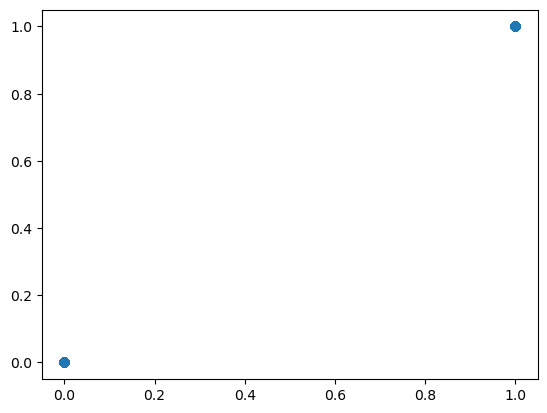

In [43]:
plt.scatter(y_train, y_hat)

In [44]:
clf.score(X_train, y_train)

1.0

In [45]:
clf.score(X_test, y_test)

1.0

### SVM

In [50]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [51]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [52]:
clf.score(X_train, y_train)

0.9925

In [53]:
clf.score(X_test, y_test)

0.9951219512195122